# Deskew in X direction
Simulating raw data as skewed in X direction by rotating it around Z. Will include actual data soon

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle

cle.get_device()

<NVIDIA GeForce RTX 3080 on Platform: NVIDIA CUDA (1 refs)>

In [2]:
voxel_size_x_in_microns = 0.1449922
voxel_size_y_in_microns = 0.1449922
voxel_size_z_in_microns = 0.3

deskewing_angle_in_degrees = 30

Original image shape (834, 118, 209)
Rotated image shape (834, 209, 118)


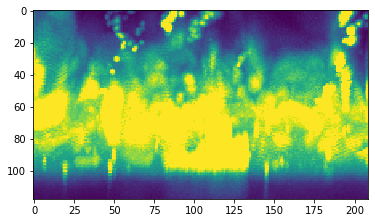

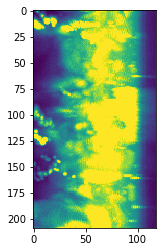

In [3]:
original_image = imread('../../data/RBC_tiny.tif')

#Rotating data around Z to simulate skew in x direction 
rotated_image = cle.rotate(original_image,angle_around_z_in_degrees=-90,auto_size = True)
print("Original image shape", original_image.shape)
print("Rotated image shape",rotated_image.shape)
cle.imshow(title = "Original Image", image= original_image)

cle.imshow(image= rotated_image, title = "Rotated Image")


### Deskew in X direction

In [4]:
deskewed_x = cle.deskew_x(rotated_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns)

deskewed_x.shape


(59, 209, 1831)

### Deskew in Y direction (for comparison)

In [5]:
deskewed_y = cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns)

deskewed_y.shape


(59, 1831, 209)

### View in napari

In [6]:
import napari
viewer = napari.Viewer()

viewer.add_image(original_image)
viewer.add_image(rotated_image)
viewer.add_image(deskewed_x)
viewer.add_image(deskewed_y)

<Image layer 'deskewed_y' at 0x2008a0f94c0>